<center> <span style="color:indigo">Machine Learning e Inferencia Bayesiana</span> </center> 

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Centro_Universitario_del_Guadalajara_Logo.png/640px-Centro_Universitario_del_Guadalajara_Logo.png" alt="Drawing" style="width: 600px;"/>
</center>
    
<center> <span style="color:DarkBlue">  Tema 12: Clustering Jerárquico, Método del Codo</span>  </center>
<center> <span style="color:Blue"> M. en C. Iván A. Toledano Juárez </span>  </center>

## Clustering jerárquico: conceptos y objetivos

El clustering jerárquico es un método no supervisado que organiza los datos en una estructura jerárquica de grupos o **clústeres**, sin necesidad de especificar previamente el número de ellos. A diferencia de algoritmos como *k-means*, el clustering jerárquico genera un árbol de fusiones o divisiones sucesivas que puede visualizarse mediante un **dendrograma**.

En este notebook se implementa el proceso completo:

1. Generación de un conjunto de datos sintético controlado.  
2. Cálculo de distancias y enlace jerárquico.  
3. Visualización mediante dendrograma.  
4. Determinación del número óptimo de clústeres mediante el **método del codo**.

Recordemos que el objetivo principal es analizar cómo el parámetro de enlace y la métrica de distancia afectan la estructura de los clústeres resultantes.

Tenemos las siguientes variables:

* $X$ dataset (dimensiones $n \times m$) de puntos a agrupar
* $n$ número de datos
* $m$ número de rasgos
* $Z$ array de enlace con información de las uniones
* $k$ número de clusters

In [5]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

### Generación del dataset sintético

Para fines demostrativos se utiliza un conjunto de datos bidimensional $(x_1, x_2)$ generado a partir de dos distribuciones normales multivariadas:

\begin{equation}
a \sim \mathcal{N}(\mu_1, \Sigma_1), \quad
b \sim \mathcal{N}(\mu_2, \Sigma_2)
\end{equation}

Al concatenar ambas poblaciones se obtiene un conjunto de datos con dos grupos bien definidos, lo que permite observar claramente el desempeño del algoritmo jerárquico.


(150, 2)


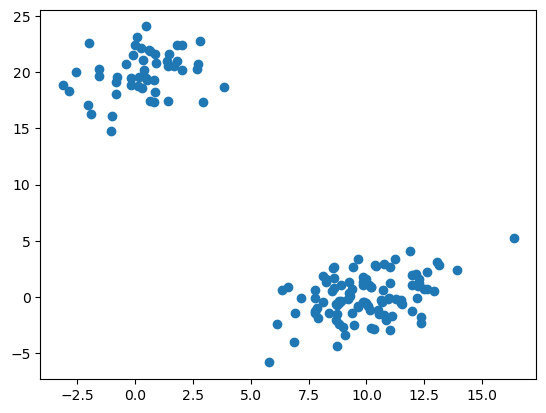

In [2]:
# Semilla aleatoria
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size=[100,]) # normal en varias dimensiones
# se generan dos columnas, una para x y otra para y, con 100 datos diferentes

# generamos otras distribuciones
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size=[50,])

# Creamos el dataset
X = np.concatenate((a,b))
print(X.shape)

# Plot
plt.scatter(X[:,0],X[:,1])
plt.show()

### Métodos de enlace y métricas de distancia

El algoritmo jerárquico requiere definir dos elementos clave:

1. **Métrica de distancia** — mide la disimilitud entre observaciones:

2. **Método de enlace** — define cómo se calcula la distancia entre grupos:

En este caso, se emplea el método de **Ward** con métrica **euclidiana**, implementado con la función `linkage()`.


In [3]:
# Generamos los enlaces
Z = linkage(X,method="ward", metric="euclidean")

In [4]:
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

Se incorpora el coeficiente de correlacion cofenética [link](https://people.revoledu.com/kardi/tutorial/Clustering/Cophenetic.htm)

In [6]:
c, coph_dist = cophenet(Z, pdist(X))
c

np.float64(0.9800148387574268)

Entre más cercano se encuentre a 1, se tiene un mejor agrupamiento.

Una de las cosas que se hacen es identificar el punto donde los clusters secundarios se empiezan a juntar con los puntos individuales

In [7]:
Z[:20]
# vemos que el indice 62 se junto con el 152, que es un nuevo cluster

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [8]:
# Vemos el cluster que lo generó
print(Z[152-len(X)])
# Primero se juntaron los indices 33 y 68, y luego éstos se agruparon con el indice 62

print(Z[158-len(X)])

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [10]:
# Vemos las coordenadas asociadas a estos índices
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

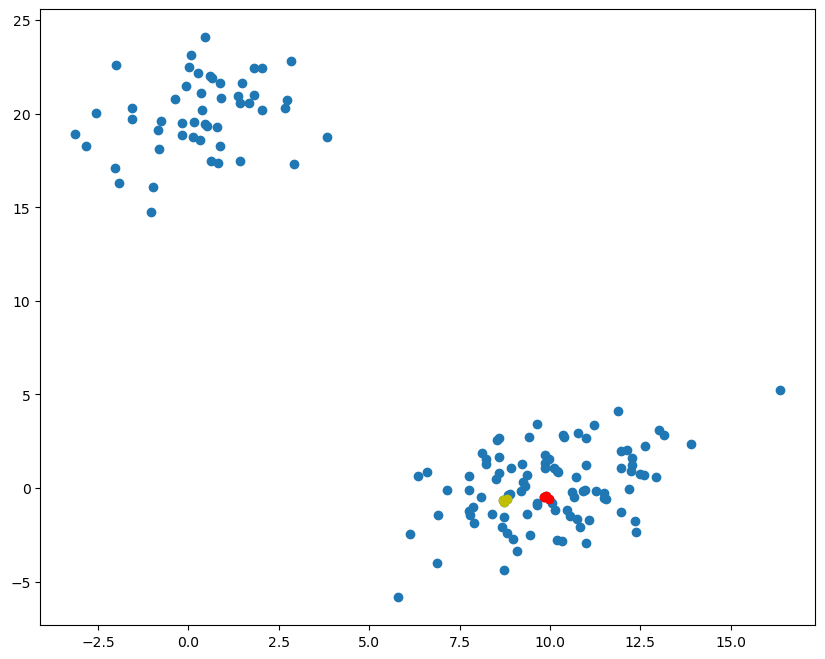

In [11]:
# Los podemos pintar de un color diferente, para ver si hay semejanzas
idx = [33,62,68]

idx2 = [15,69,41]

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1]) # pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r') # ponemos en rojo los puntos seleccionads
plt.scatter(X[idx2,0], X[idx2,1], c='y') 

plt.show()

### Visualización del dendrograma

El dendrograma representa gráficamente el proceso de agrupamiento jerárquico.  
Cada unión entre ramas indica una fusión entre clústeres, y la altura del enlace refleja la distancia (o disimilitud) entre los grupos fusionados.

Interpretación:

- Ramas cortas → alta similitud entre elementos.  
- Ramas largas → menor similitud, fusión a mayores distancias.  
- Cortar el dendrograma a una altura $h$ permite determinar un número $k$ de clústeres.

Matemáticamente, el proceso de enlace puede interpretarse como una secuencia de fusiones que minimizan una función de costo $J$:

\begin{equation}
J = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
\end{equation}

donde $\mu_i$ es el centroide del clúster $C_i$.


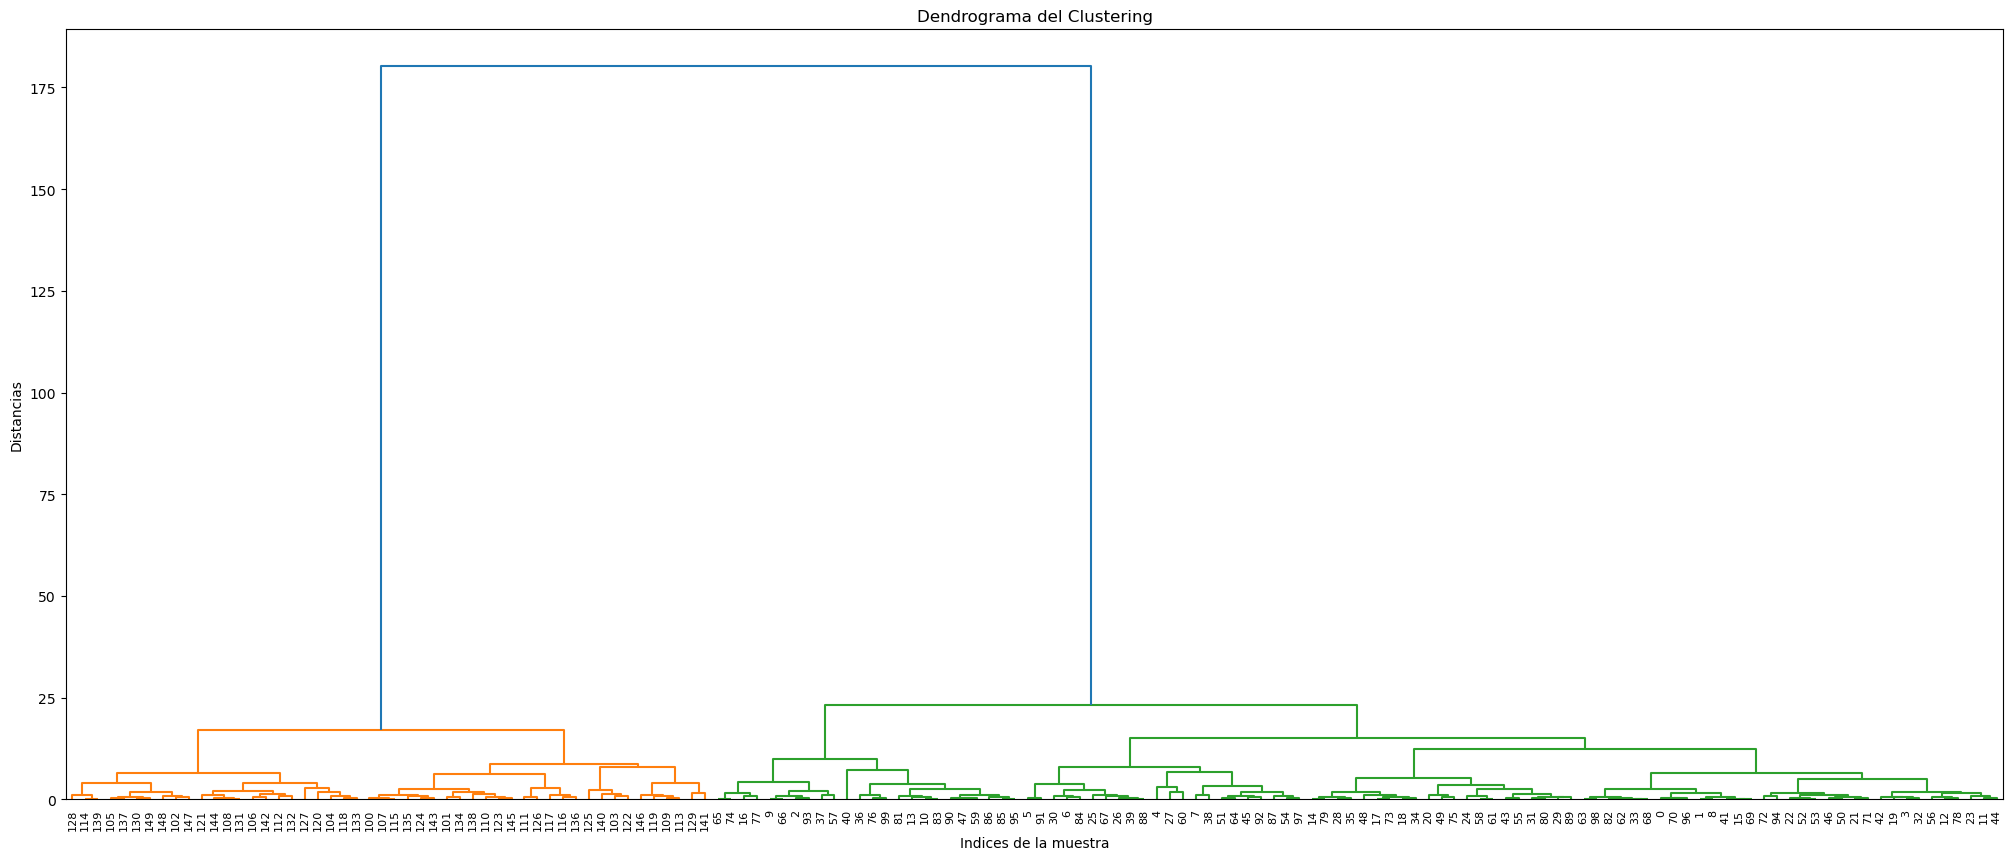

In [12]:
plt.figure(figsize=(25,10)) # Este es el maximo disponible

plt.title("Dendrograma del Clustering")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")

dendrogram(Z, leaf_rotation=90.0,leaf_font_size=8.0)
plt.show()


En distancias superiores a 25 unidades, hay un gran salto, para la unión final de todos los elementos.

In [13]:
# Si examinamos los últimos elementos
Z[-4:,]
# Estas son las últimas distancias

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

Aquí vemos elementos que tienen distancias muy diferentes. Y entonces, tal vez en el último caso no deberían ser unidos.El endrograma permite poner un threshold para los clusters.

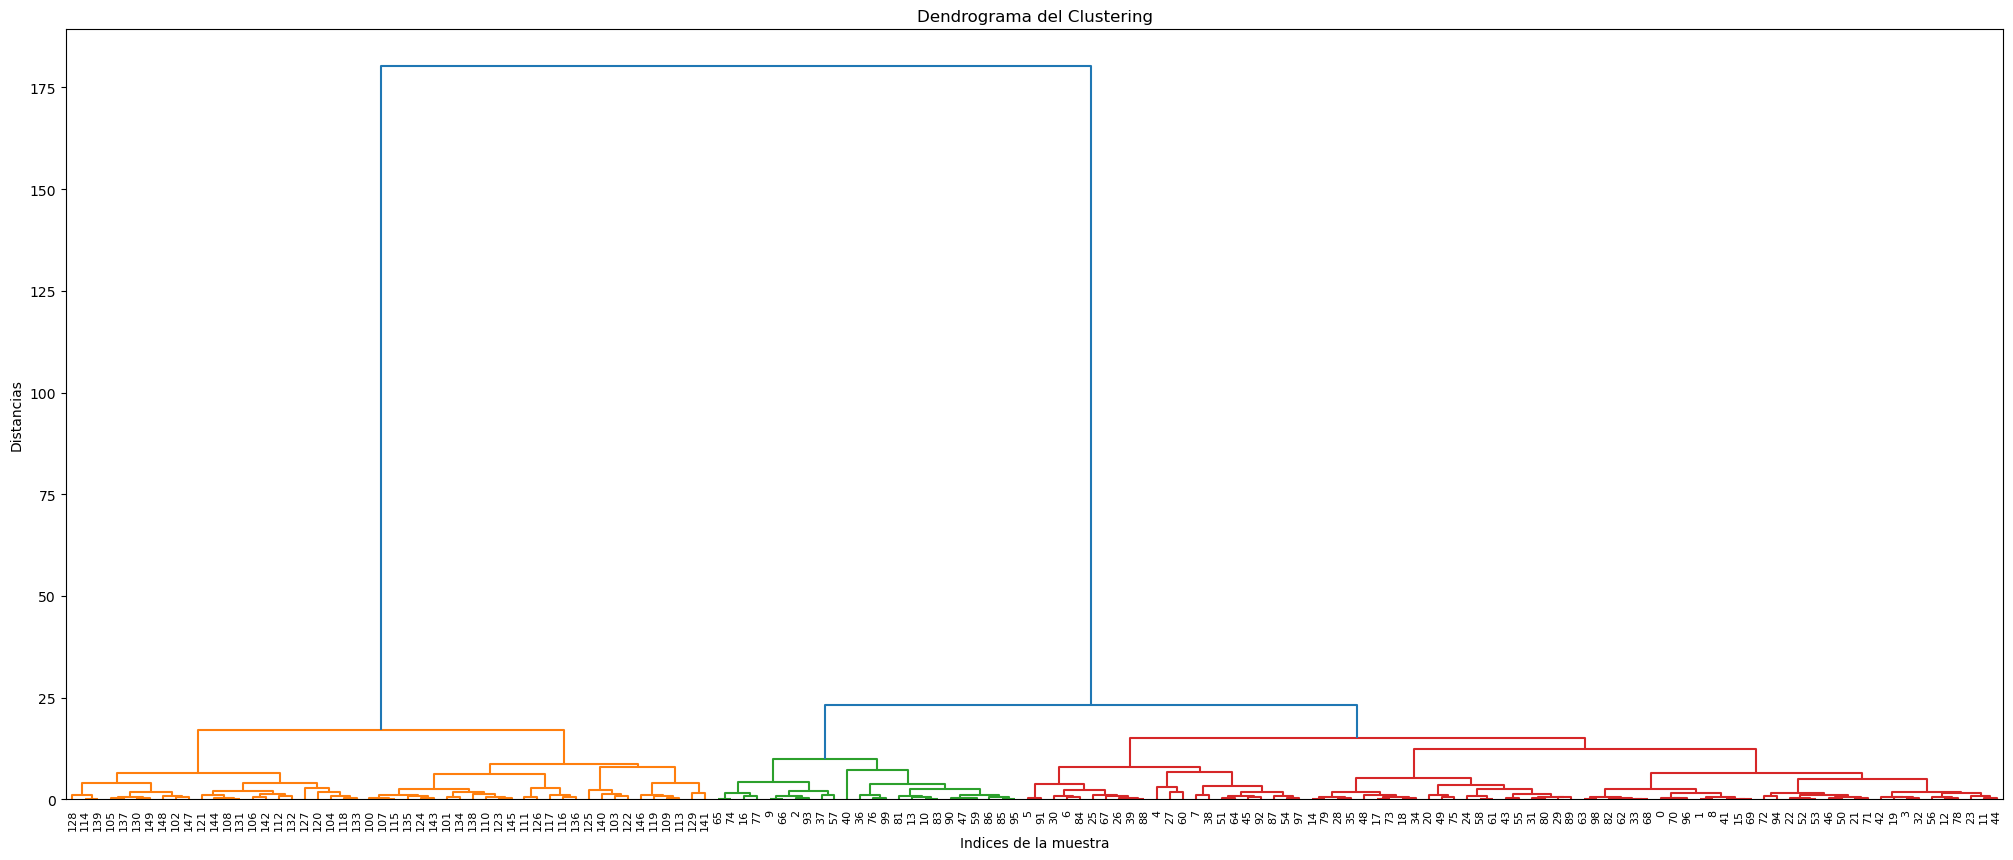

In [14]:
plt.figure(figsize=(25,10)) # Este es el maximo disponible

plt.title("Dendrograma del Clustering")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")

dendrogram(Z, leaf_rotation=90.0,leaf_font_size=8.0, color_threshold=0.1*180) # Se agrega un porcentaje de la distancia global 
plt.show()


## Reducción del dendrograma

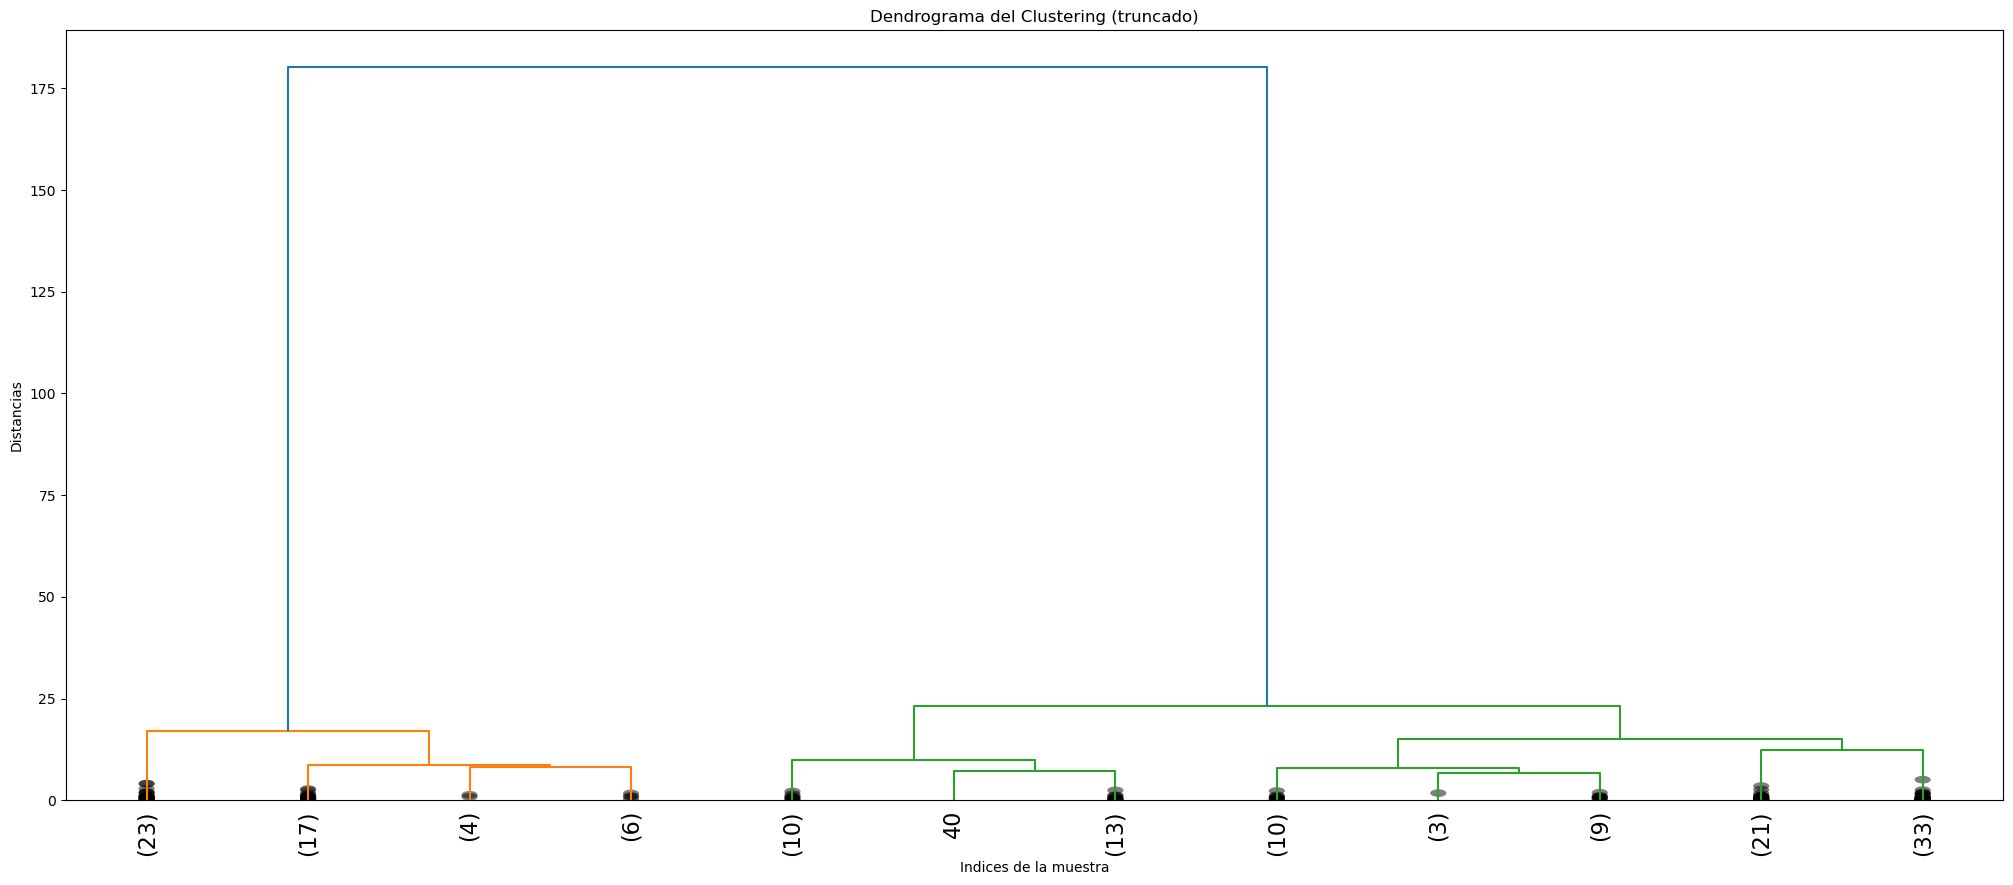

In [15]:
plt.figure(figsize=(25,10)) # Este es el maximo disponible

plt.title("Dendrograma del Clustering (truncado)")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")

dendrogram(Z, leaf_rotation=90.0,leaf_font_size=16.0, color_threshold=0.7*180,
          truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True) # Se agrega un porcentaje de la distancia global 
# Los últimos p cluster que han sido unidos
plt.show()

## Dendrograma con más detalle

In [23]:
def dendrogram_detailed(*args, **kwargs):
    max_d = kwargs.pop("max_d", None) ## la maxima distancia de los argumentos
    if max_d  and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Clustering jerárquico (Detallado)')
        plt.xlabel("Índice del DataSet (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for index, distance, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(index[1:3])
            y = distance[1] # la altura
            if y>annotate_above:
                plt.plot(x,y,'o',c=color)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords='offset points', va='top', ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

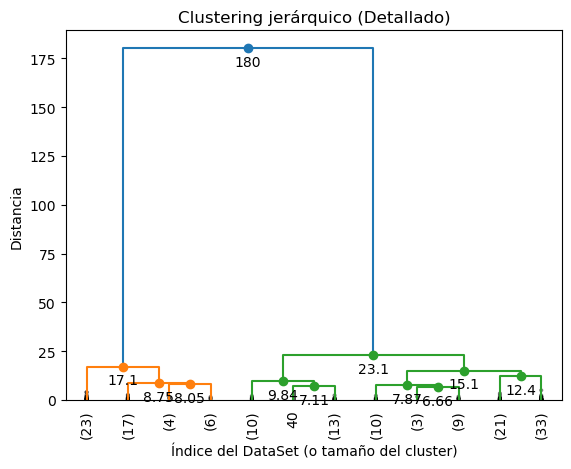

In [28]:
dendro = dendrogram_detailed(Z, leaf_rotation=90.0,leaf_font_size=10.0, color_threshold=0.7*180,
          truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)

### Corte automático del dendrograma

En el contexto de clustering jerárquico, la inconsistencia mide cuánto difiere la distancia a la que se uno un grupo (linkage), respecto a las distancias promedio de las fusiones que la componen.

En otras palabras, compara la altura (distancia) de un enlace del dendrograma con la altura promedio de los enlaces que lo preceden en su subárbol.

Supongamos que tenemos un enlace $u$, que combina dos subgrupos $A$ y $B$ en un nuevo grupo $C$. Para este enlace la inconsistencia se define como

\begin{equation}
I(u) = \frac{d(u) - \mu_p}{\sigma_p}
\end{equation}

donde,

* $d(u)$ es la distancia (altura en el dendrograma) en la que ocurre la fusión $u$.
* $\mu_p$ es la media de las distancias de los enlaces “por debajo” de $u$ (sus descendientes), hasta una profundidad $p$.
* $\sigma_p$ es la desviación estándar de esas distancias.

Si $I(u)$ es bajo, cercano a 0 por ejemplo, sifinifica que la fusión ocurre a una distancia similar a la de sus descendientes y por tanto el grupo es **consistente** (homogéneo).
Si $I(u)$ es alto, la fusión ocurre a una distancia mucho mayor y el grupo es **inconsistente** (heterogéneo), lo que puede indicar una frontera natural entre clústeres.

[Link1](https://stackoverflow.com/questions/47021492/python-hierarchical-clustering-inconsistency-what-do-the-outputs-for-the-incons)
[Link2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html)

In [32]:
from scipy.cluster.hierarchy import inconsistent

In [33]:
depth = 5 # Es cada uno de los cluster que se forma junto con los 5 anteriores.
incons = inconsistent(Z, depth)
incons[-10:] # promedio, desviacion estandar, count, factor de inconsistencia para las uniones

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

En el último paso hubo un salto importante en el coeficiente. Es muy dependiente del parámetro **depth** del árbol.

### Método del codo para determinar el número óptimo de clústeres

El **método del codo** (elbow method) consiste en analizar cómo varía la *distancia de enlace* o la *inercia* (varianza intracluster) conforme aumenta el número de clústeres $k$.

A medida que $k$ crece, la inercia total disminuye.  
Sin embargo, llega un punto en el que la mejora marginal es pequeña — ese punto forma un “codo” en la gráfica y se interpreta como el número óptimo de clústeres.

Formalmente, la inercia se define como:

\begin{equation}
W(k) = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
\end{equation}

El objetivo es encontrar $k^*$ tal que la disminución de $W(k)$ entre $k$ y $k+1$ deje de ser significativa:

\begin{equation}
\frac{W(k) - W(k+1)}{W(k)} < \epsilon
\end{equation}


In [35]:
# se fija en la aceleración del cambio
# nos quedamos con los últimos registros
last = Z[-10:,2] # nos quedamos solo con las distancias
last_rev = last[::-1] # la reversa del array
last_rev

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

In [36]:
# tomamos indices
idx = np.arange(1,len(last) + 1)

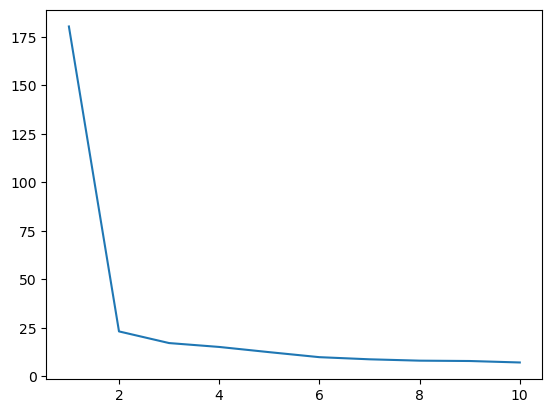

In [37]:
#plot
plt.plot(idx,last_rev)
plt.show()

## Se ve un codo en la grafica

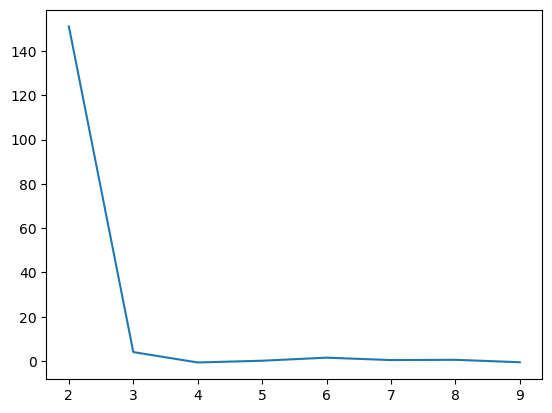

El número óptimo de clusters es 2


In [39]:
# Podemos ver los cambios (aceleración)
acc = np.diff(last,2) # restando cada uno con el siguiente valor
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev) # El índice se modifica pues se va por las diferencias, hay un dato menos
plt.show()

k = acc_rev.argmax() + 2 # Nos dice el indice donde se da este gran cambio (como una segunda derivada)
print('El número óptimo de clusters es %s'%str(k))

## Ejemplo

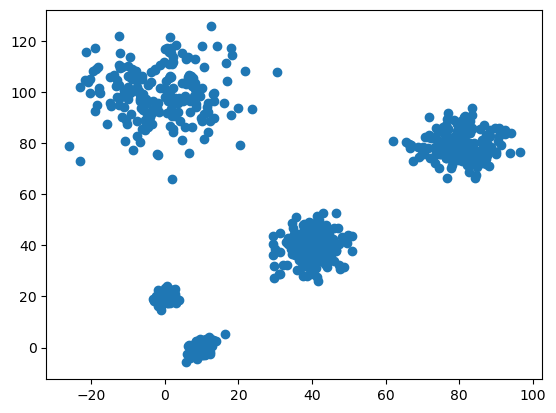

In [40]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])

X2 = np.concatenate((X,c,d,e),)

plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [41]:
Z2 = linkage(X2,"ward")

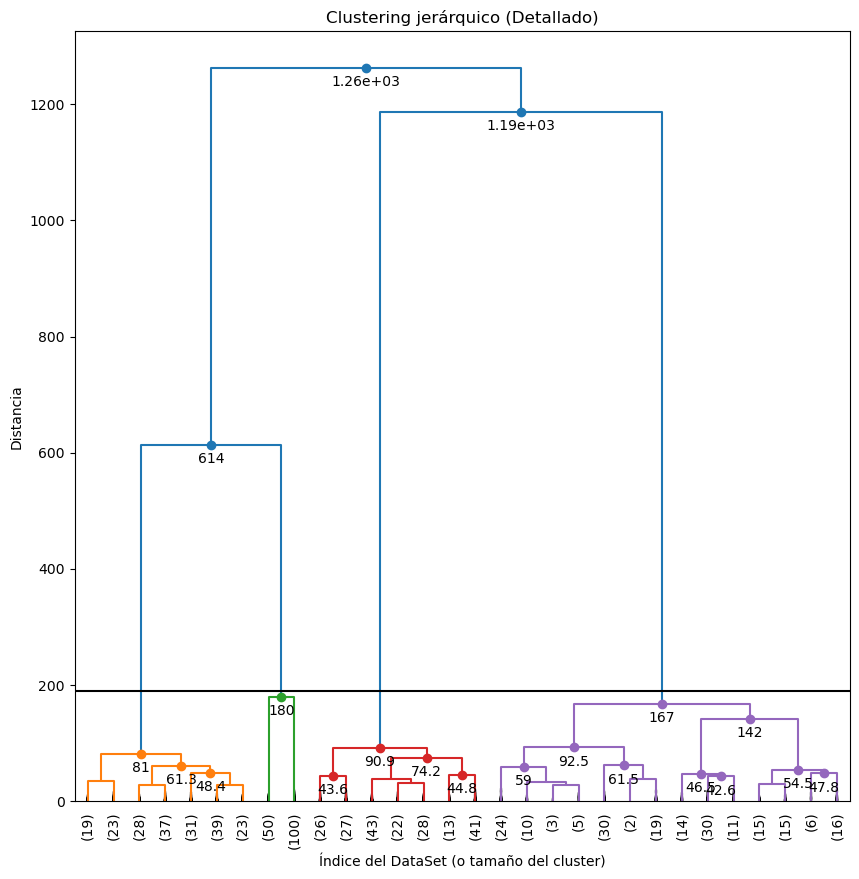

In [42]:
plt.figure(figsize=(10,10))

dendrogram_detailed(Z2,truncate_mode='lastp',p=30, leaf_rotation=90.0,leaf_font_size=10.0,
                   show_contracted=True, annotate_above=40, max_d = 190.0)

plt.show()


[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


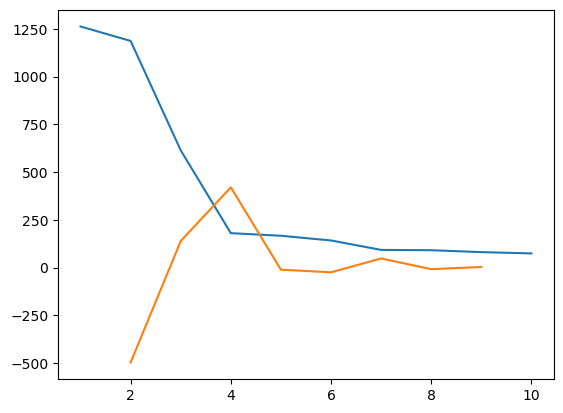

El número óptimo de clusters es 4


In [43]:
last = Z2[-10:,2] 
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1,len(last) + 1)
plt.plot(idx,last_rev)

acc = np.diff(last,2) 
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev) 
plt.show()
k = acc_rev.argmax() + 2
print('El número óptimo de clusters es %s'%str(k))

Tanto en la aceleracion, como en el codo, coincide en el indice 4. Esto coincide con una distancia de 614.

## Visualizacion final de los clusters y sus elementos

In [44]:
from scipy.cluster.hierarchy import fcluster

In [45]:
# Utilizamos el primer data set Z
# Corte por distancia
max_d = 20
clusters = fcluster(Z,max_d,criterion="distance")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [46]:
# Corte por numero de clusters
k=3
clusters = fcluster(Z,k,criterion="maxclust")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
# por default fcluster utiliza el metodo con el coeficiente de inconsistencia
clusters = fcluster(Z, 8, depth=10) # se introduce el numero minimo de elementos que tiene que formar parte del cluster
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

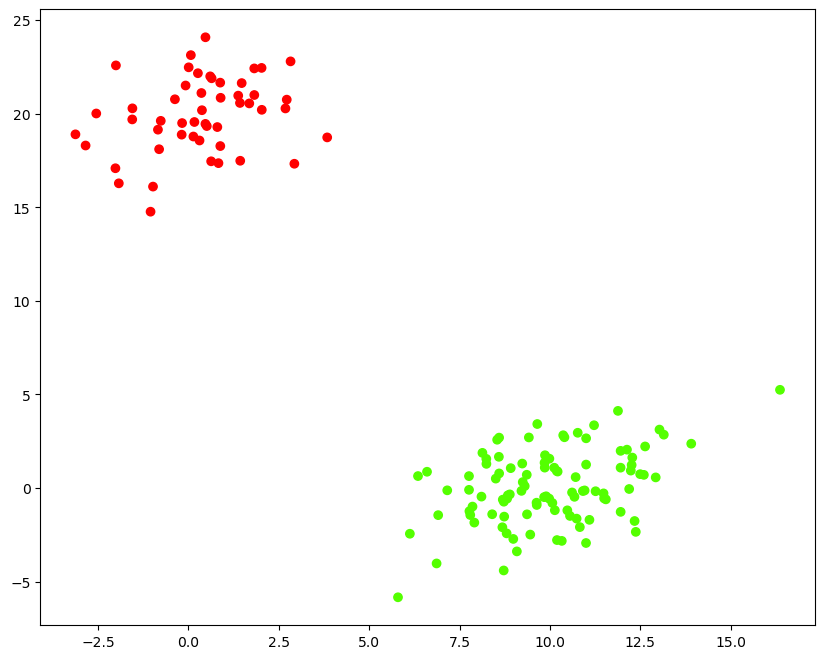

In [48]:
# Para visualizar estos clusters
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism") # unicamente se toma la salida del fcluster como color
plt.show()

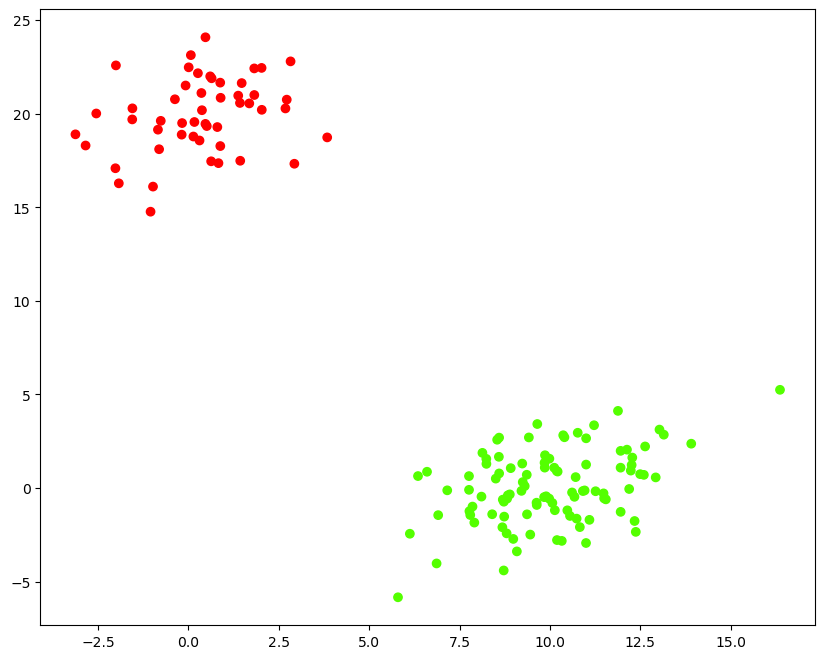

In [49]:
max_d = 25 # hago el corte un poco despues
clusters = fcluster(Z,max_d,criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism") # unicamente se toma la salida del fcluster como color
plt.show()

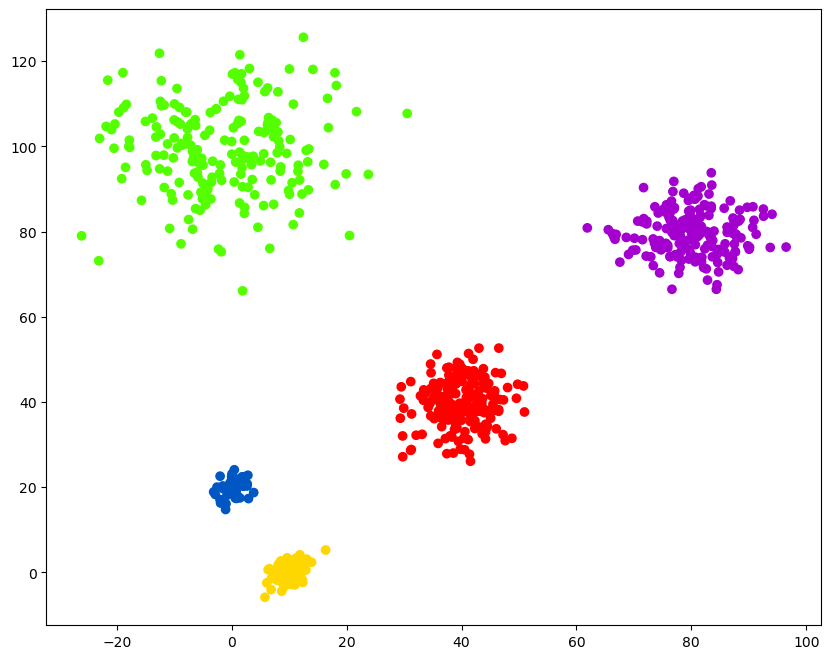

In [50]:
# Para el otro dataset

max_d = 170 # hago el corte basado en la altura, en 190 ya no sale
clusters = fcluster(Z2,max_d,criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="prism") # unicamente se toma la salida del fcluster como color
plt.show()

### Conclusiones

El clustering jerárquico permite descubrir estructuras de agrupamiento sin definir el número de clústeres de antemano.  
El uso del método de **Ward** con métrica **euclidiana** produce agrupamientos compactos y bien separados cuando los datos presentan estructuras gaussianas.

El **dendrograma** es una herramienta visual esencial para interpretar las relaciones jerárquicas entre observaciones, mientras que el **método del codo** proporciona un criterio práctico para seleccionar un número razonable de clústeres en el corte del árbol jerárquico.
